<a href="https://colab.research.google.com/github/SinghLavanya/Customer_Segmentation-Analysis/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the dependencies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Data Collection and Ana
lysis

In [ ]:
#loading the cvs file as pandas dataframe
df=pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
#print 1st 5 rows of the dataset
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#getting to know more about our dataset, using statistics
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(200, 5)

In [ ]:
#check the missing values in the datset
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [ ]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

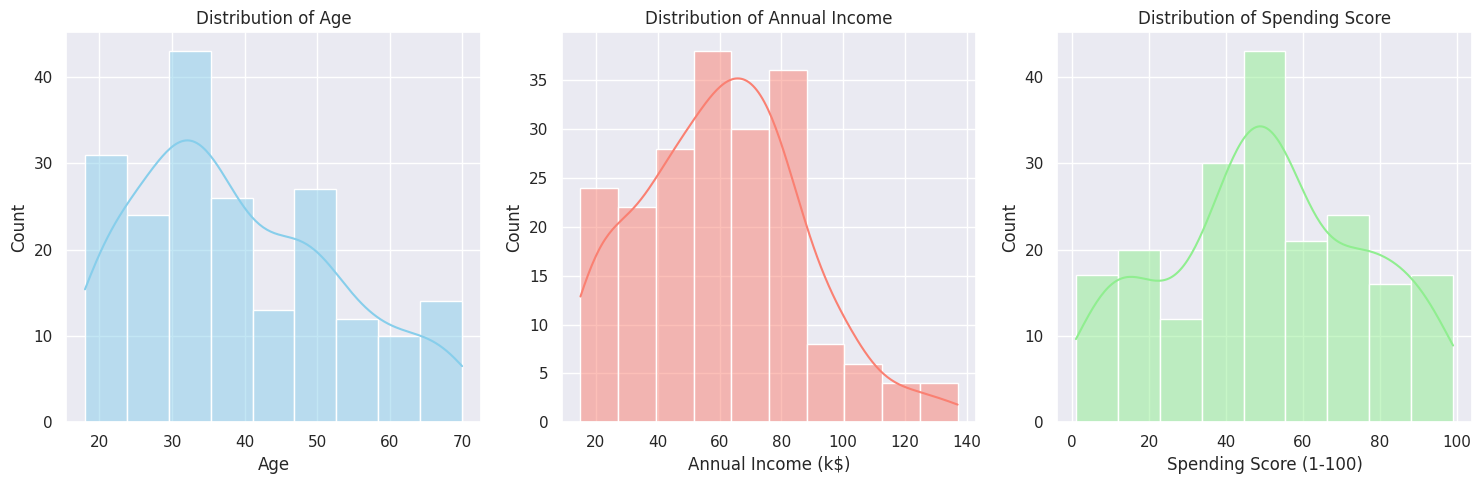

In [ ]:
# EDA: Distribution of age, income, and spending score
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, color='salmon')
plt.title('Distribution of Annual Income')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, color='lightgreen')
plt.title('Distribution of Spending Score')

plt.tight_layout()
plt.show()

Selecting proper clusters


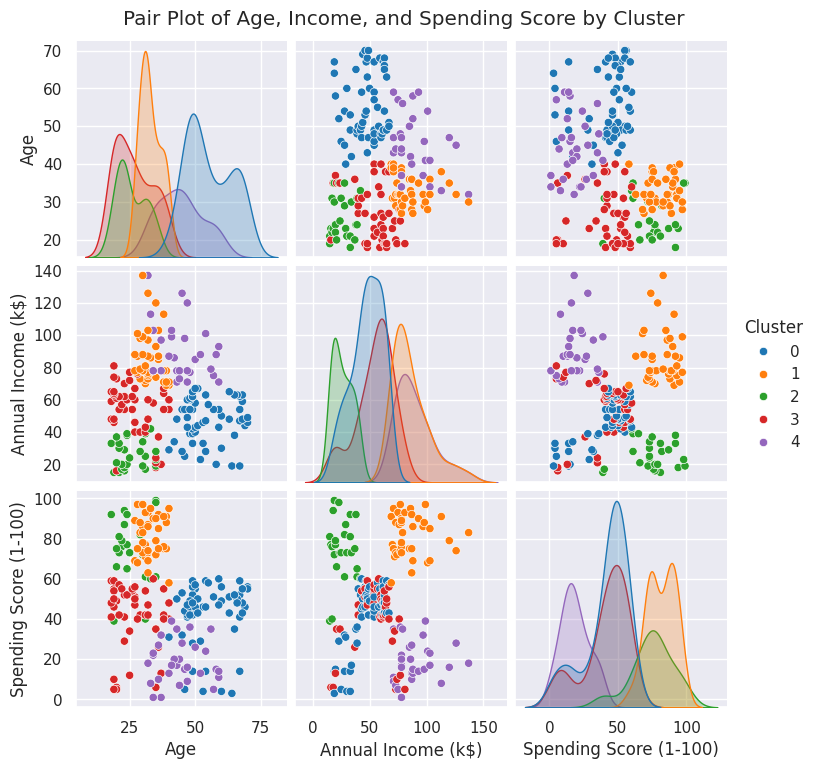

In [ ]:
 # Pair plot to observe the relationship between features with clusters
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']], hue='Cluster', palette='tab10')
plt.suptitle('Pair Plot of Age, Income, and Spending Score by Cluster', y=1.02)
plt.show()

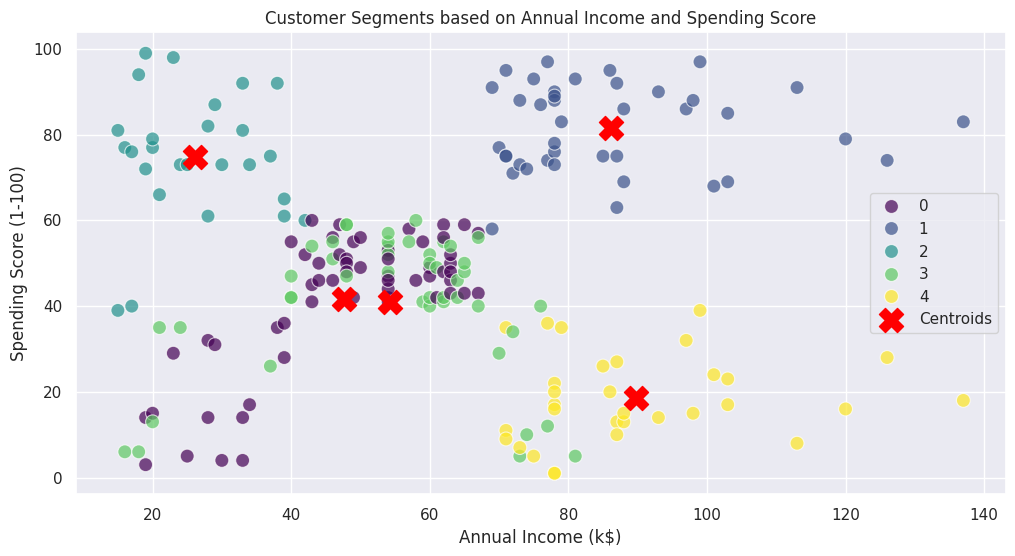

In [ ]:
# Scatter plot for visualizing clusters in 2D
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)',
    hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7
)
plt.scatter(
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 2],
    s=300, c='red', label='Centroids', marker='X'
)
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

from numbers import Number
optimum Number of clusters = 5

<ipython-input-29-8cec1f3e1c6f>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(k_range, inertia, 'bo-', color='purple')


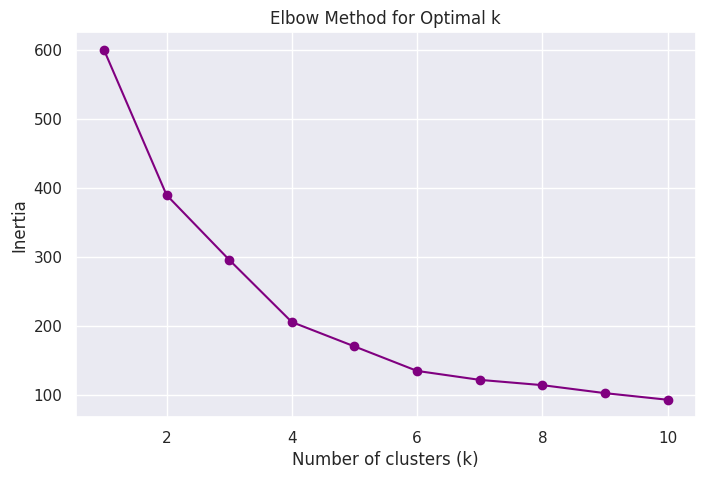

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-', color='purple')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# Apply K-Means with the selected number of clusters (e.g., k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original dataset
df['Cluster'] = clusters

# Display a sample of the dataset with cluster labels
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())

   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   19                  15                      39        2
1   21                  15                      81        2
2   20                  16                       6        3
3   23                  16                      77        2
4   31                  17                      40        2
